# Natural Language Processing

## Bag of Words

Bag of Words is a method used to represent text in a numerical format.

- The frequency of words within documents is key.
- Text structures like chapters, paragraphs, and grammar are ignored.
- Splits text based on spaces and punctuation.
- **Document:** A single piece of textual data.
- **Corpus:** The collection of all documents, representing the entire dataset.

**Steps:**

1. **Tokenization:** Split each document into individual words.
2. **Vocabulary:** Create a collection of all unique words across all documents.
3. **Encoding:** Represent each document by the frequency of its words from the vocabulary.

## CountVectorizer()

In [58]:
corpus = ['How are you?',
          'How old are you?',
          'What is your name?']

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [60]:
cv.fit(corpus)

CountVectorizer()

- The whole words in the corpus in alphabetical order.

In [61]:
# aplhabetical order
cv.vocabulary_

{'how': 1,
 'are': 0,
 'you': 6,
 'old': 4,
 'what': 5,
 'is': 2,
 'your': 7,
 'name': 3}

In [62]:
vocabulary_list = []
for i in range(len(cv.vocabulary_)):
    for key, value in cv.vocabulary_.items():
        if value == i:
            vocabulary_list.append(key)

vocabulary_list

['are', 'how', 'is', 'name', 'old', 'what', 'you', 'your']

- The number of words in the whole corpus.

In [63]:
len(cv.vocabulary_)

8

- The transform() method returns the numerical representation of each document
- It returns a sparse matrix
- Use toarray() method to convert it to an array
- 1 stands for existence of the corresponding word in the vocabulary in the document.
- 0 stands for non-existence of the corresponding word in the vocabulary in the document.
 

In [64]:
cv.transform(corpus)

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [65]:
cv.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 1]])

In [66]:
import pandas as pd
pd.DataFrame(cv.transform(corpus).toarray(), columns=vocabulary_list)

,are,how,is,name,old,what,you,your
0,1,1,0,0,0,0,1,0
1,1,1,0,0,1,0,1,0
2,0,0,1,1,0,1,0,1


In [67]:
cv.transform(['I am here']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0]])

In [68]:
cv.transform(['How do you do?']).toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0]])

## YouTube Spam Collection
https://archive.ics.uci.edu/dataset/380/youtube+spam+collection

In [69]:
# pip install ucimlrepo

### Data

In [70]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
youtube_spam_collection = fetch_ucirepo(id=380) 
  
# data (as pandas dataframes) 
df_X = youtube_spam_collection.data.features 
df_y = youtube_spam_collection.data.targets 


In [214]:
df_X.tail()

,AUTHOR,DATE,CONTENT
1951,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...
1952,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...
1953,jeffrey jules,2013-07-13T12:09:31.188000,wow
1954,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo
1955,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer


In [72]:
df_y.head()

,CLASS
0,1
1,1
2,1
3,1
4,1


df_X.shape, df_y.shape

In [73]:
# metadata 
type(youtube_spam_collection.metadata)

ucimlrepo.dotdict.dotdict

In [74]:
youtube_spam_collection.metadata.keys()

dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])

In [75]:
youtube_spam_collection.metadata.abstract

'It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.'

In [76]:
# variable information 
youtube_spam_collection.variables

,name,role,type,demographic,description,units,missing_values
0,VIDEO,ID,Categorical,None,None,None,no
1,COMMENT_ID,ID,Categorical,None,None,None,no
2,AUTHOR,Feature,Categorical,None,None,None,no
3,DATE,Feature,Categorical,None,None,None,no
4,CONTENT,Feature,Categorical,None,None,None,no
5,CLASS,Target,Binary,None,None,None,no


In [77]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [78]:
df[df['CLASS'] == 0].head()

,AUTHOR,DATE,CONTENT,CLASS
7,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
16,Zielimeek21,2013-11-28T21:49:00,I'm only checking the views﻿,0
20,zhichao wang,2013-11-29T02:13:56,i think about 100 millions of the views come f...,0
23,Owen Lai,2013-12-01T04:51:52,just checking the views﻿,0
28,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here ...,0


In [79]:
X = df_X.CONTENT.values
X[0]

'Huh, anyway check out this you[tube] channel: kobyoshi02'

In [80]:
y = df_y.CLASS.values
y[0]

1

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1467,), (489,))

### CountVectorizer()

In [82]:
cv = CountVectorizer().fit(X_train)
X_train_bag = cv.transform(X_train)
X_test_bag  = cv.transform(X_test)

X_train_bag.shape, X_test_bag.shape 

((1467, 3679), (489, 3679))

In [83]:
cv.get_feature_names_out()

array(['00', '000', '002', ..., 'ｓｈｏｅｃｏｌｌｅｃｔｏｒ314', 'ｕｓｒ', 'ｗｗｗ'],
      dtype=object)

#### min_df

In [84]:
cv_min = CountVectorizer(min_df=10).fit(X_train)
X_min_train_bag = cv.transform(X_train)
X_min_test_bag  = cv.transform(X_test)

X_min_train_bag.shape, X_min_test_bag.shape 

((1467, 3679), (489, 3679))

#### max_df

In [85]:
cv_max = CountVectorizer(max_df=5).fit(X_train)
X_max_train_bag = cv.transform(X_train)
X_max_test_bag  = cv.transform(X_test)

X_max_train_bag.shape, X_max_test_bag.shape 

((1467, 3679), (489, 3679))

#### stop_words

In [86]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
list(ENGLISH_STOP_WORDS)[:10]

['their',
 'we',
 'find',
 'do',
 'couldnt',
 'former',
 'amongst',
 'further',
 'others',
 'third']

In [87]:
cv_sw = CountVectorizer(stop_words='english').fit(X_train)
X_sw_train_bag = cv.transform(X_train)
X_sw_test_bag  = cv.transform(X_test)

X_sw_train_bag.shape, X_sw_test_bag.shape 

((1467, 3679), (489, 3679))

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_bag, y_train)

rf.score(X_train_bag, y_train), rf.score(X_test_bag, y_test)

(1.0, 0.9427402862985685)

In [89]:
rf.predict(cv.transform(['It is really good.']))

array([0])

In [90]:
rf.predict(cv.transform(['I do not like it.']))

array([0])

In [91]:
rf.predict(cv.transform(['Youc an earn lots of money']))

array([0])

In [92]:
rf.predict(X_test_bag[:5])

array([0, 0, 1, 0, 0])

In [93]:
print(X_test[0])

I'm watching this in 2014﻿


In [94]:
print(X_test[2])

Like this comment if you still jam out to this song after 4 years ﻿


### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
from collections import Counter
Counter(y_test)

Counter({1: 263, 0: 226})

In [97]:
confusion_matrix(y_test, rf.predict(X_test_bag))

array([[219,   7],
       [ 21, 242]])

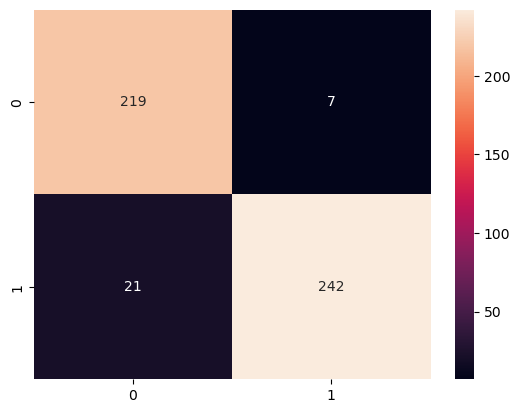

In [98]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_bag)), annot=True, fmt='d');

## tf-idf 
- Term Frequency-Inverse Document Frequency
- tf-idf is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).
- A word receives a higher weight if it frequently appears in a specific document but is rare across other documents.

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape 

((1467, 3679), (489, 3679))

In [118]:
X_train_tfidf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [119]:
for i in X_train_tfidf[0].toarray()[0]:
    if i != 0:
        print(i)

0.3738993842265373
0.42706490679643794
0.3752264208041245
0.3301365281288447
0.4462904256050391
0.4783875811481708


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_tfidf, y_train)

rf.score(X_train_tfidf, y_train), rf.score(X_test_tfidf, y_test)

(1.0, 0.9427402862985685)

## Sentiment Analysis
- A pre-trained model is used to classify a given string as either positive or negative in sentiment.

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [44]:
sia.polarity_scores('It is very useful.')

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [45]:
sia.polarity_scores('I will go there.')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [46]:
sia.polarity_scores('It is very ugly.')

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5563}

## Worldcount
https://amueller.github.io/word_cloud/

### Default
- The algorithm might give more weight to the ranking of the words than their actual frequencies, depending on the max_font_size and the scaling heuristic.

(-0.5, 399.5, 199.5, -0.5)

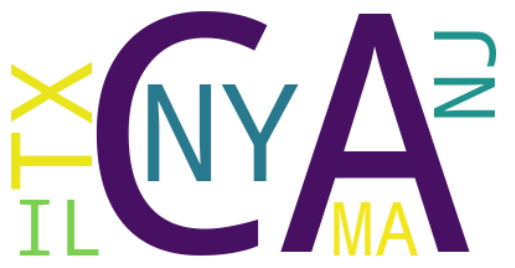

In [186]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = 'NY NY NY NJ TX TX CA CA CA CA CA IL MA'
wc = WordCloud(background_color='white', random_state=0, max_font_size=300, repeat=False)
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

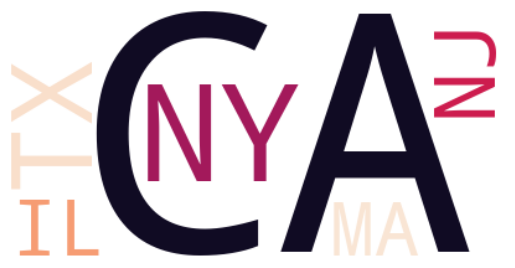

In [193]:
# colormap: rocket
wc = WordCloud(background_color='white', random_state=0, max_font_size=300, repeat=False, colormap='rocket')
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [188]:
# weights
wc.words_

{'CA': 1.0, 'NY': 0.6, 'TX': 0.4, 'NJ': 0.2, 'IL': 0.2, 'MA': 0.2}

In [189]:
wc.layout_

[(('CA', 1.0), 268, (1, 53), None, 'rgb(71, 16, 99)'),
 (('NY', 0.6), 109, (60, 104), None, 'rgb(41, 121, 142)'),
 (('TX', 0.4), 91, (39, 1), 2, 'rgb(234, 229, 26)'),
 (('NJ', 0.2), 68, (9, 342), 2, 'rgb(32, 146, 140)'),
 (('IL', 0.2), 63, (153, 1), None, 'rgb(122, 209, 81)'),
 (('MA', 0.2), 60, (155, 258), None, 'rgb(244, 230, 30)')]

### Frequency

(-0.5, 399.5, 199.5, -0.5)

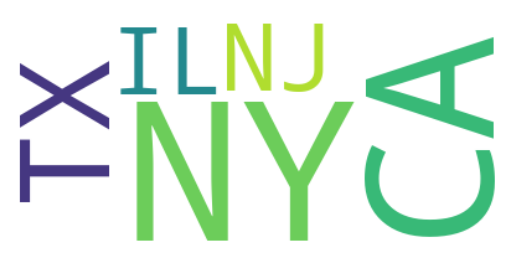

In [184]:
wc = WordCloud(background_color="white", max_words=1000)

text = 'NY NY NY NY NY NY NJ TX TX CA CA CA  CA CA IL'

freq_dict = {}

for i in text.split():
      freq_dict[i] = freq_dict.get(i, 0) +1

wc.generate_from_frequencies(freq_dict)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")


### Single Word
This is an example from the documentation:
- Create a word cloud using a single word that is repeated multiple times.

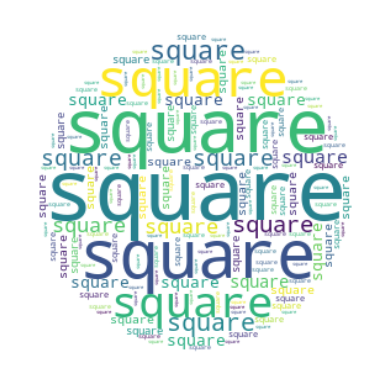

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = 'square'

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

[np.ogrid](https://numpy.org/doc/stable/reference/generated/numpy.ogrid.html) `ogrid` returns an open multi-dimensional grid, which is essentially a range of values in a specified shape. 
- It's like creating a grid of coordinates for calculations but more memory-efficient than a full meshgrid.

In [160]:
x, y = np.ogrid[:5, :5]

mask = (x - 1) ** 2 + (y - 2) ** 2 > 3 ** 2
mask = 255 * mask.astype(int)

mask

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [255, 255,   0, 255, 255]])

### Alice

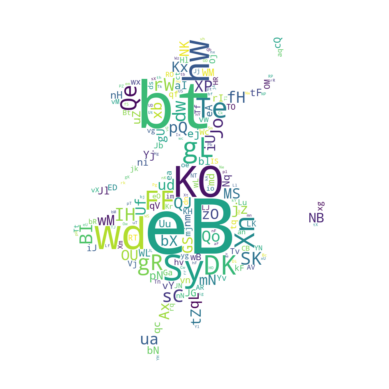

In [213]:
from PIL import Image
import string
import random

alice_mask = np.array(Image.open("pict/alice_mask.png"))

text = ''

for i in range(1000):
    text +=  random.choice(string.ascii_letters) + random.choice(string.ascii_letters) + ' '


freq_dict = {}

for i in text.split():
      freq_dict[i] = freq_dict.get(i, 0) +1


wc = WordCloud(background_color="white", mask=alice_mask)
wc.generate_from_frequencies(freq_dict)


plt.imshow(wc, interpolation="bilinear")
plt.axis("off");